## Introduction_to_Neural_Networks_and_Deep_Learning_R7_Project2


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


The objective of the project is to learn how to implement a simple image classification pipeline based on the k-Nearest Neighbour and a deep neural network. The goals of this assignment are as follows:

1 - Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages)

2 - Data fetching and understand the train/val/test splits.

3 - Implement and apply an optimal k-Nearest Neighbor (kNN) classifier (7.5 points)

4 - Print the classification metric report (2.5 points)

5 - Implement and apply a deep neural network classifier including (feedforward neural network, RELU activations) (5 points)

6 - Understand and be able to implement (vectorized) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions) (2.5 points)

7 - Implement batch normalization for training the neural network (2.5 points)● Understand the differences and trade-offs between traditional and NN classifiers with the help of classification metrics (5 points)

In [0]:

import pandas as pd
import h5py
import numpy as np

In [0]:
f = h5py.File('/content/drive/My Drive/AIML/projects/NLP_Proj_2/SVHN_single_grey1.h5', 'r')

In [6]:
# List all groups 
print("Keys: %s" % f.keys())
a_group_key = list(f.keys())[0]

Keys: KeysView(<HDF5 file "SVHN_single_grey1.h5" (mode r)>)


In [0]:
# Get the data

X_test = np.array(f[list(f.keys())[0]])
X_train = np.array(f[list(f.keys())[1]])
X_val = np.array(f[list(f.keys())[2]])
y_test = np.array(f[list(f.keys())[3]])
y_train = np.array(f[list(f.keys())[4]])
y_val = np.array(f[list(f.keys())[5]])

In [8]:
print("X_test Shape: ", X_test.shape)
print("X_train Shape: ", X_train.shape)
print("X_val Shape: ", X_val.shape)
print("y_test Shape: ", y_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_val Shape: ", y_val.shape)

X_test Shape:  (18000, 32, 32)
X_train Shape:  (42000, 32, 32)
X_val Shape:  (60000, 32, 32)
y_test Shape:  (18000,)
y_train Shape:  (42000,)
y_val Shape:  (60000,)


In [9]:
print("Number of Classes in y_test:{}, y_train:{}, y_val:{}".format(len(np.unique(y_test)),
                                                                    len(np.unique(y_train)), len(np.unique(y_val))))

Number of Classes in y_test:10, y_train:10, y_val:10


In [10]:
#Subsample the data for more efficient code execution
import tensorflow as tf
num_training =  5000
mask = range(num_training)
X_train = X_train[mask]
trainY = y_train[mask]

num_val = 1000
mask = range(num_val)
X_val = X_val[mask]
valY = y_val[mask]

num_test = 1000
mask = range(num_test)
X_test = X_test[mask]
testY = y_test[mask]

In [12]:
print(trainY.shape)


(5000,)


In [0]:
from sklearn.neighbors import KNeighborsClassifier 
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline

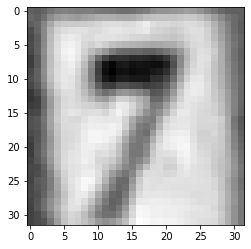

In [14]:
# Display digit 7
plt.imshow(X_train[2], cmap=plt.cm.gray_r, interpolation='nearest')

In [15]:
print("X_test Shape: ", X_test.shape)
print("X_train Shape: ", X_train.shape)
print("X_val Shape: ", X_val.shape)
print("y_test Shape: ", testY.shape)
print("y_train Shape: ", trainY.shape)
print("y_val Shape: ", valY.shape)

X_test Shape:  (1000, 32, 32)
X_train Shape:  (5000, 32, 32)
X_val Shape:  (1000, 32, 32)
y_test Shape:  (1000,)
y_train Shape:  (5000,)
y_val Shape:  (1000,)


In [0]:
# Reshape the image data into rows
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], -1))
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], -1))
X_val_reshaped = np.reshape(X_val, (X_val.shape[0], -1))

In [17]:
print(X_train_reshaped.shape)
print(X_test_reshaped.shape)
print(X_val_reshaped.shape)

(5000, 1024)
(1000, 1024)
(1000, 1024)


In [0]:
# Create a kNN classifier with 10 neighbors: knn
knn = KNeighborsClassifier(n_neighbors = 10)

In [19]:
# Fit the classifier to the training data
knn.fit(X_train_reshaped, trainY)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [20]:
# Print the accuracy
print("Accuracy with k = 10: ", knn.score(X_val_reshaped, valY)*100, '%')

Accuracy with k = 10:  54.1 %


with k=10, we can see that accuracy is not very good.

In [21]:
# re-initialize the values of k for our k-Nearest Neighbor classifier along with the
# list of accuracies for each value of k
kVals = range(1, 30, 2)
accuracies = []
 
# loop over various values of `k` for the k-Nearest Neighbor classifier
for k in range(1, 20, 2):
    # train the k-Nearest Neighbor classifier with the current value of `k`
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_reshaped, trainY)
 
    # evaluate the model and update the accuracies list
    score = model.score(X_val_reshaped, valY)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)
 
# find the value of k that has the largest accuracy
i = int(np.argmax(accuracies))
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],
accuracies[i] * 100))

k=1, accuracy=42.20%
k=3, accuracy=61.50%
k=5, accuracy=56.80%
k=7, accuracy=53.70%
k=9, accuracy=55.30%
k=11, accuracy=53.70%
k=13, accuracy=52.30%
k=15, accuracy=54.10%
k=17, accuracy=54.00%
k=19, accuracy=51.00%
k=3 achieved highest accuracy of 61.50% on validation data


In [22]:
from sklearn.metrics import classification_report
# re-train our classifier using the best k value and predict the labels of the
# test data
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_reshaped, trainY)
predictions = model.predict(X_test_reshaped)
 
# show a final classification report demonstrating the accuracy of the classifier
# for each of the digits
print("EVALUATION ON TESTING DATA")
print(classification_report(testY, predictions))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       0.30      0.63      0.41       117
           1       0.29      0.61      0.39        93
           2       0.28      0.38      0.33        92
           3       0.25      0.25      0.25        85
           4       0.51      0.43      0.47        96
           5       0.35      0.21      0.26       105
           6       0.33      0.22      0.27        94
           7       0.72      0.46      0.56       107
           8       0.48      0.16      0.24       100
           9       0.41      0.17      0.24       111

    accuracy                           0.36      1000
   macro avg       0.39      0.35      0.34      1000
weighted avg       0.40      0.35      0.34      1000



I think that digit for i - 485 is: 0


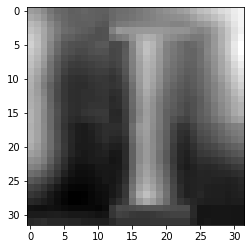

I think that digit for i - 393 is: 2


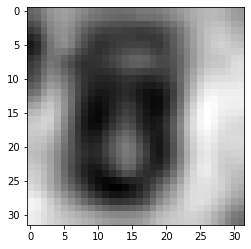

I think that digit for i - 985 is: 3


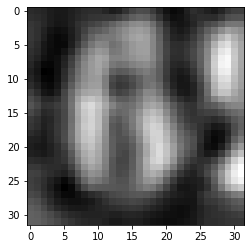

I think that digit for i - 941 is: 6


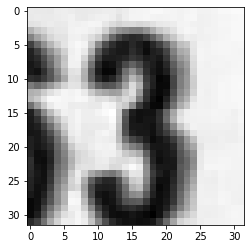

I think that digit for i - 557 is: 0


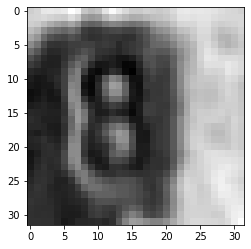

In [23]:
from sklearn import datasets
from skimage import exposure
import numpy as np
import imutils
import cv2
# loop over a few random digits
for i in list(map(int, np.random.randint(0, high=len(testY), size=(5,)))):
    # grab the image and classify it
    image = X_test[i]
    prediction = model.predict(image.reshape(1, -1))[0]
 
    # convert the image for a 1024-dim array to an 32 x 32 image,
    # then resize it to 32 x 32 pixels so we can see it better
    image = image.reshape((32, 32)).astype("uint8")
    image = exposure.rescale_intensity(image, out_range=(0, 255))
    image = imutils.resize(image, width=32, inter=cv2.INTER_CUBIC)
 
    # show the prediction
    print("I think that digit for i - {} is: {}".format(i, prediction))
    plt.imshow(X_train[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

We see that the KNN Classifier is rather poor in image classification for the above dataset. Now, let us try our hand at image classification through Deep Learning using Keras, with the same dataset.


# **Image Classification Using DNN**

In [0]:
# Get the data
X_test = np.array(f[list(f.keys())[0]])
X_train = np.array(f[list(f.keys())[1]])
X_val = np.array(f[list(f.keys())[2]])
y_test = np.array(f[list(f.keys())[3]])
y_train = np.array(f[list(f.keys())[4]])
y_val = np.array(f[list(f.keys())[5]])

In [25]:
print("X_test Shape: ", X_test.shape)
print("X_train Shape: ", X_train.shape)
print("X_val Shape: ", X_val.shape)
print("y_test Shape: ", y_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_val Shape: ", y_val.shape)

X_test Shape:  (18000, 32, 32)
X_train Shape:  (42000, 32, 32)
X_val Shape:  (60000, 32, 32)
y_test Shape:  (18000,)
y_train Shape:  (42000,)
y_val Shape:  (60000,)


In [0]:
trainY = tf.keras.utils.to_categorical(y_train, num_classes=10)
testY = tf.keras.utils.to_categorical(y_test, num_classes=10)
valY = tf.keras.utils.to_categorical(y_val, num_classes=10)

In [27]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 32x32 to 1024
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(200, activation='relu'))

In [0]:
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='relu'))

In [0]:
#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(60, activation='relu'))


In [0]:
#Add 4th hidden layer
model.add(tf.keras.layers.Dense(30, activation='relu'))

In [0]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

In [0]:

#Compile the model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dense (Dense)                (None, 200)               205000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 60)                6060      
_________________________________________________________________
dense_3 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                3

In [36]:
model.fit(X_train,trainY,          
          validation_data=(X_test,testY),
          epochs=10,
          batch_size=128)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 4s 91us/sample - loss: 1.9881 - acc: 0.2965 - val_loss: 1.8824 - val_acc: 0.4002
Epoch 2/10
42000/42000 [==============================] - 3s 81us/sample - loss: 1.2524 - acc: 0.5983 - val_loss: 1.5325 - val_acc: 0.5348
Epoch 3/10
42000/42000 [==============================] - 3s 81us/sample - loss: 1.0070 - acc: 0.6867 - val_loss: 1.2348 - val_acc: 0.6171
Epoch 4/10
42000/42000 [==============================] - 3s 78us/sample - loss: 0.8740 - acc: 0.7305 - val_loss: 1.9642 - val_acc: 0.5242
Epoch 5/10
42000/42000 [==============================] - 3s 76us/sample - loss: 0.7931 - acc: 0.7557 - val_loss: 0.9867 - val_acc: 0.7009
Epoch 6/10
42000/42000 [==============================] - 3s 74us/sample - loss: 0.7293 - acc: 0.7754 - val_loss: 1.1549 - val_acc: 0.6677
Epoch 7/10
42000/42000 [==============================] - 3s 76us/sample - loss: 0.6892 - acc: 0.7862 - val_loss: 1.

After Several Combinations of the various Epochs and Batch Size, I found that 10 epochs with a batch size of 128 yielded the best results at the extreme end with a accuracy of 81.70% 

In [0]:
#Now let us try with varying learning rates with same model hyperparameters
sgd_optimizer_lr_1 = tf.keras.optimizers.SGD(lr=0.01)
sgd_optimizer_lr_5 = tf.keras.optimizers.SGD(lr=0.05)
sgd_optimizer_lr_10 = tf.keras.optimizers.SGD(lr=0.1)

In [0]:
#Compile the model
model.compile(optimizer=sgd_optimizer_lr_1, loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
model.fit(X_train,trainY,          
          validation_data=(X_test,testY),
          epochs=10,
          batch_size=128)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 3s 78us/sample - loss: 0.4915 - acc: 0.8520 - val_loss: 0.6732 - val_acc: 0.8064
Epoch 2/10
42000/42000 [==============================] - 3s 76us/sample - loss: 0.4740 - acc: 0.8564 - val_loss: 0.6422 - val_acc: 0.8164
Epoch 3/10
42000/42000 [==============================] - 3s 78us/sample - loss: 0.4600 - acc: 0.8608 - val_loss: 0.8415 - val_acc: 0.7649
Epoch 4/10
42000/42000 [==============================] - 3s 82us/sample - loss: 0.4537 - acc: 0.8624 - val_loss: 0.7192 - val_acc: 0.7975
Epoch 5/10
42000/42000 [==============================] - 3s 82us/sample - loss: 0.4435 - acc: 0.8651 - val_loss: 0.7452 - val_acc: 0.7933
Epoch 6/10
42000/42000 [==============================] - 3s 81us/sample - loss: 0.4354 - acc: 0.8665 - val_loss: 0.6555 - val_acc: 0.8155
Epoch 7/10
42000/42000 [==============================] - 3s 80us/sample - loss: 0.4262 - acc: 0.8708 - val_loss: 0.

In [0]:
#Compile the model
model.compile(optimizer=sgd_optimizer_lr_5, loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
model.fit(X_train,trainY,          
          validation_data=(X_test,testY),
          epochs=10,
          batch_size=128)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 4s 86us/sample - loss: 0.6732 - acc: 0.7949 - val_loss: 1.3275 - val_acc: 0.6526
Epoch 2/10
42000/42000 [==============================] - 3s 80us/sample - loss: 0.5723 - acc: 0.8184 - val_loss: 1.2504 - val_acc: 0.6642
Epoch 3/10
42000/42000 [==============================] - 3s 82us/sample - loss: 0.5312 - acc: 0.8338 - val_loss: 1.0161 - val_acc: 0.7021
Epoch 4/10
42000/42000 [==============================] - 3s 80us/sample - loss: 0.5051 - acc: 0.8418 - val_loss: 1.5781 - val_acc: 0.6501
Epoch 5/10
42000/42000 [==============================] - 3s 82us/sample - loss: 0.4818 - acc: 0.8473 - val_loss: 1.7271 - val_acc: 0.6432
Epoch 6/10
42000/42000 [==============================] - 3s 78us/sample - loss: 0.4664 - acc: 0.8532 - val_loss: 0.7966 - val_acc: 0.7766
Epoch 7/10
42000/42000 [==============================] - 3s 77us/sample - loss: 0.4474 - acc: 0.8585 - val_loss: 0.

In [0]:
#Compile the model
model.compile(optimizer=sgd_optimizer_lr_10, loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
model.fit(X_train,trainY,          
          validation_data=(X_test,testY),
          epochs=10,
          batch_size=128)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 3s 81us/sample - loss: 0.5946 - acc: 0.8125 - val_loss: 2.8811 - val_acc: 0.4826
Epoch 2/10
42000/42000 [==============================] - 3s 79us/sample - loss: 0.5306 - acc: 0.8318 - val_loss: 1.9371 - val_acc: 0.5948
Epoch 3/10
42000/42000 [==============================] - 3s 81us/sample - loss: 0.4852 - acc: 0.8462 - val_loss: 1.2373 - val_acc: 0.6787
Epoch 4/10
42000/42000 [==============================] - 3s 81us/sample - loss: 0.4596 - acc: 0.8538 - val_loss: 1.8318 - val_acc: 0.6422
Epoch 5/10
42000/42000 [==============================] - 4s 85us/sample - loss: 0.4358 - acc: 0.8628 - val_loss: 1.2874 - val_acc: 0.7027
Epoch 6/10
42000/42000 [==============================] - 3s 82us/sample - loss: 0.4187 - acc: 0.8651 - val_loss: 1.0603 - val_acc: 0.7349
Epoch 7/10
42000/42000 [==============================] - 4s 85us/sample - loss: 0.4002 - acc: 0.8719 - val_loss: 1.

It seems increasing learning rates for Stochastic Gradient Descent has a positive effect on the accuracy. A learning rate of 0.1 has proven very effective as can be seen from the above results. Let us now try once with the Adam optimizer.

In [0]:
#Compile the model
adam_optimizer = tf.keras.optimizers.Adam(lr = 0.0005)
model.compile(optimizer= adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
model.fit(X_train,trainY,          
          validation_data=(X_test,testY),
          epochs=10,
          batch_size=128)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 4s 97us/sample - loss: 0.3985 - acc: 0.8792 - val_loss: 0.6036 - val_acc: 0.8439
Epoch 2/10
42000/42000 [==============================] - 4s 86us/sample - loss: 0.3132 - acc: 0.8998 - val_loss: 0.6536 - val_acc: 0.8304
Epoch 3/10
42000/42000 [==============================] - 4s 91us/sample - loss: 0.3081 - acc: 0.9022 - val_loss: 0.6032 - val_acc: 0.8462
Epoch 4/10
42000/42000 [==============================] - 4s 84us/sample - loss: 0.2865 - acc: 0.9082 - val_loss: 0.6232 - val_acc: 0.8418
Epoch 5/10
42000/42000 [==============================] - 3s 83us/sample - loss: 0.2894 - acc: 0.9065 - val_loss: 0.6384 - val_acc: 0.8394
Epoch 6/10
42000/42000 [==============================] - 4s 85us/sample - loss: 0.2830 - acc: 0.9105 - val_loss: 0.6196 - val_acc: 0.8437
Epoch 7/10
42000/42000 [==============================] - 4s 85us/sample - loss: 0.2650 - acc: 0.9147 - val_loss: 0.


We see excellent results after various combinations of Adam Optimizer Learning Rates and witness the highest accuracy of all models and hyperparameters with Adam Optimizer having a learning rate of 0.0005 and Batch Size 128 with 10 epochs. It is certain that results may improve through further tuning, but I feel we have reached a satisfactory model state with validation accuracy approaching the 90% range, which can be considered a good model for image classification.

From above we note that Deep Neural Networks offer a significant improvement in image classification accuracy as compared to plain vanilla KNN Classifiers. Therefore, the use of DNN with Keras for image classification is justified.

In [0]:
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array

In [50]:
#Lets Predict Images using our model
out = model.predict(X_test[0:10])
print(np.argmax(out, axis=1))

[0 7 2 9 0 9 1 8 1 4]


I think that digit is: 0


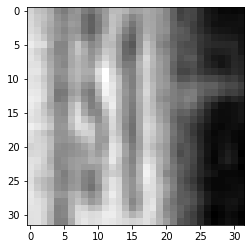

I think that digit is: 7


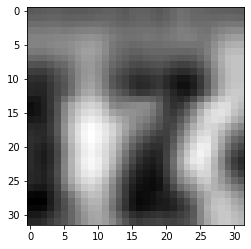

I think that digit is: 2


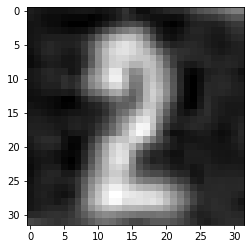

I think that digit is: 9


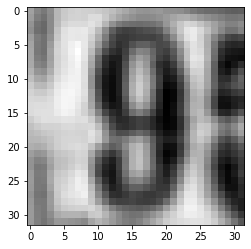

I think that digit is: 0


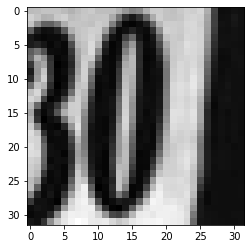

I think that digit is: 9


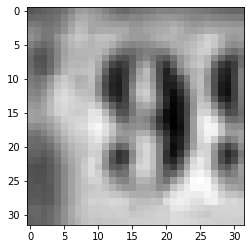

I think that digit is: 1


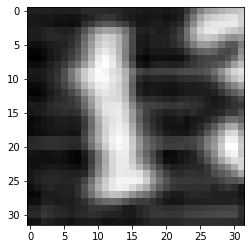

I think that digit is: 8


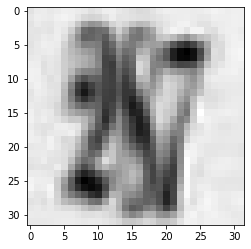

I think that digit is: 1


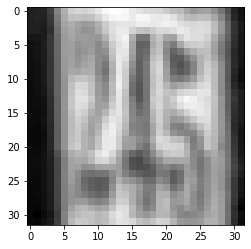

I think that digit is: 4


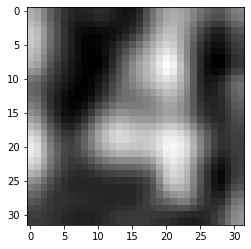

In [51]:
for i in range(0,10):
    print("I think that digit is: {}".format(np.argmax(out, axis=1)[i]))
    plt.imshow(X_test[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

We see that the model predicts images quite accurately, as per the accuracy mentioned in the model summary. Therefore, it seems we are ok with this model and approaching the human accuracy.

# Conclusion

Based on our experimentation of various classification mechanisms both classical as well through Deep Neural Networks, we may reach the conclusion that DNNs are quite efficient for image classification.

Metrics show accuracy to be sub par i.e. around 50% for classical ML KNN models whereas they show a healthy accuracy for tuned models around 90%.